# A/B Testing: Marketing Campaign Effectiveness

This project analyzes the effectiveness of two types of marketing campaigns: Ad campaigns and PSA (Public Service Announcements); using A/B testing data. The goal is to evaluate the conversion rates between these two test groups and determine if the difference in conversion rates is statistically significant.

Key statistical methods such as the **Chi-Square Test**, **Shapiro-Wilk Test**, **Levene's Test**, and **Mann-Whitney U Test** were used to check assumptions and validate the results.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a global style
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('marketing_AB.csv')

In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## Data Preprocessing

The dataset initially contained user IDs and irrelevant columns, which were removed to focus on the key metrics: `test group`, `converted`, `total ads`, `most ads day`, and `most ads hour`.

After cleaning, the dataset consists of:
- Two test groups: `ad` and `psa`
- A binary variable `converted`, indicating whether a conversion occurred
- Data on the number of ads shown (`total ads`), the day with the most ads (`most ads day`), and the hour when the most ads were shown (`most ads hour`)

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [8]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [11]:
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]

In [12]:
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [14]:
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariate Analysis

We begin by analyzing the distribution of key variables such as `test group`, `converted`, `most ads day`, and `most ads hour`. For each variable, we visualize the distribution using count plots and pie charts to better understand the categorical data.

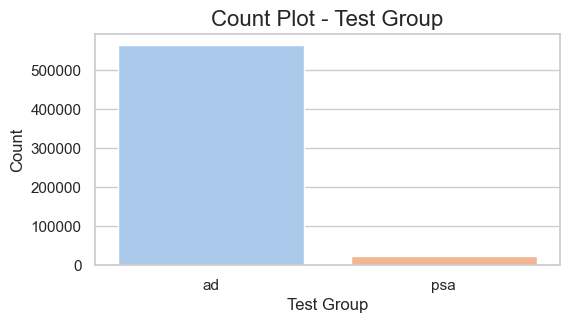

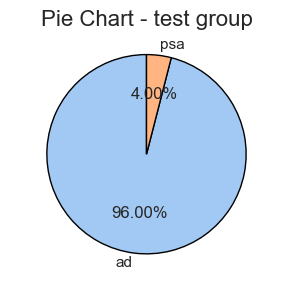

In [44]:
variable = 'test group'

# Improved Plot 1: Count Plot for 'test group'
plt.figure(figsize=(6, 3))
sns.countplot(x='test group', data=df_cat, palette="pastel")
plt.title('Count Plot - Test Group', fontsize=16)
plt.xlabel('Test Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Pie chart
plt.figure(figsize=(6, 3))
counts = df_cat[variable].value_counts()
plt.subplot(1, 2, 2)
plt.pie(counts, labels=counts.index, autopct='%0.2f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title(f'Pie Chart - {variable}', fontsize=16)
plt.axis('equal') 

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 600x400 with 0 Axes>

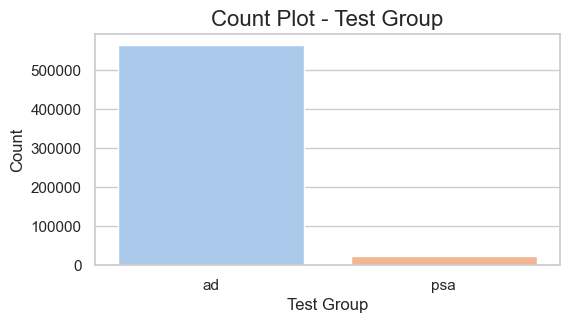

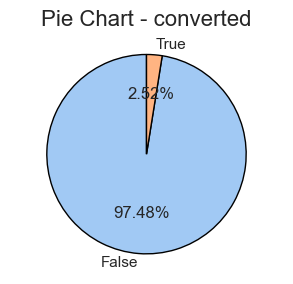

In [48]:
variable = 'converted'

plt.figure(figsize=(6, 4))

# Improved Plot 1: Count Plot for 'test group'
plt.figure(figsize=(6, 3))
sns.countplot(x='test group', data=df_cat, palette="pastel")
plt.title('Count Plot - Test Group', fontsize=16)
plt.xlabel('Test Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Pie chart
plt.figure(figsize=(6, 3))
counts = df_cat[variable].value_counts()
plt.subplot(1, 2, 2)
plt.pie(counts, labels=counts.index, autopct='%0.2f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title(f'Pie Chart - {variable}', fontsize=16)
plt.axis('equal') 

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

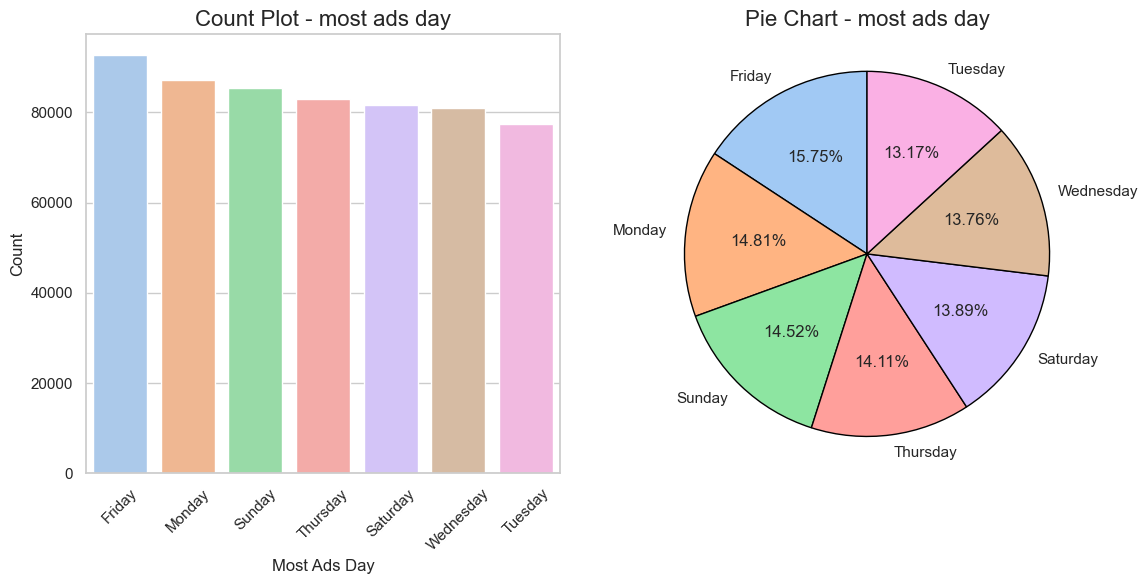

In [46]:
variable = 'most ads day'

# Count Plot and Pie Chart for 'most ads day' variable
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order=df_cat['most ads day'].value_counts().index, palette=palette)
plt.title(f'Count Plot - {variable}', fontsize=16)
plt.xlabel('Most Ads Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title(f'Pie Chart - {variable}', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

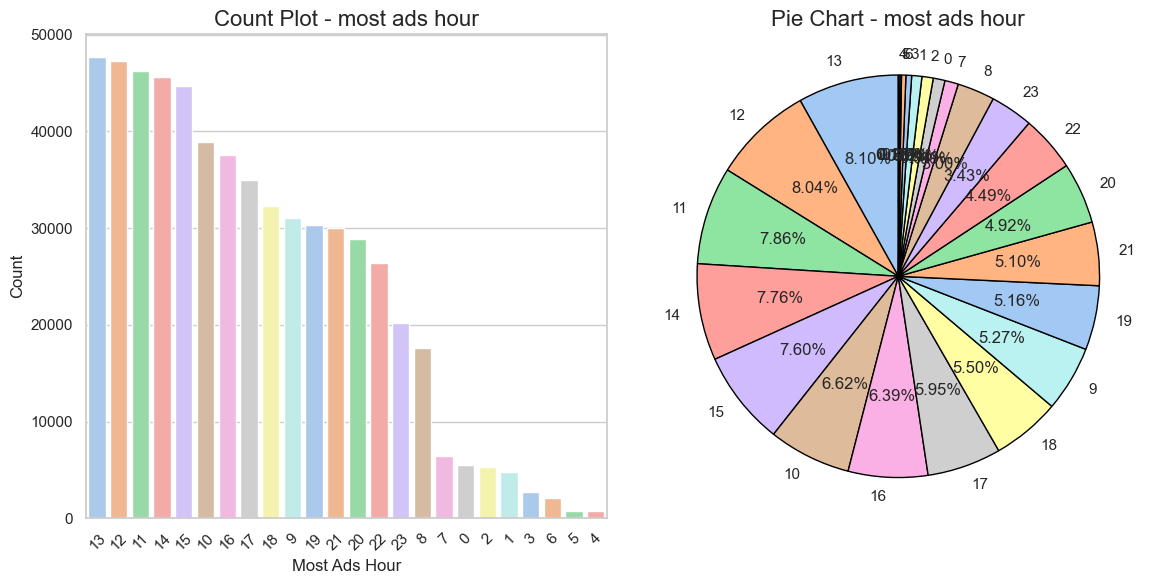

In [49]:
variable = 'most ads hour'

# Count Plot and Pie Chart for 'most ads hour' variable
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order=df_cat['most ads hour'].value_counts().index, palette=palette)
plt.title(f'Count Plot - {variable}', fontsize=16)
plt.xlabel('Most Ads Hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title(f'Pie Chart - {variable}', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

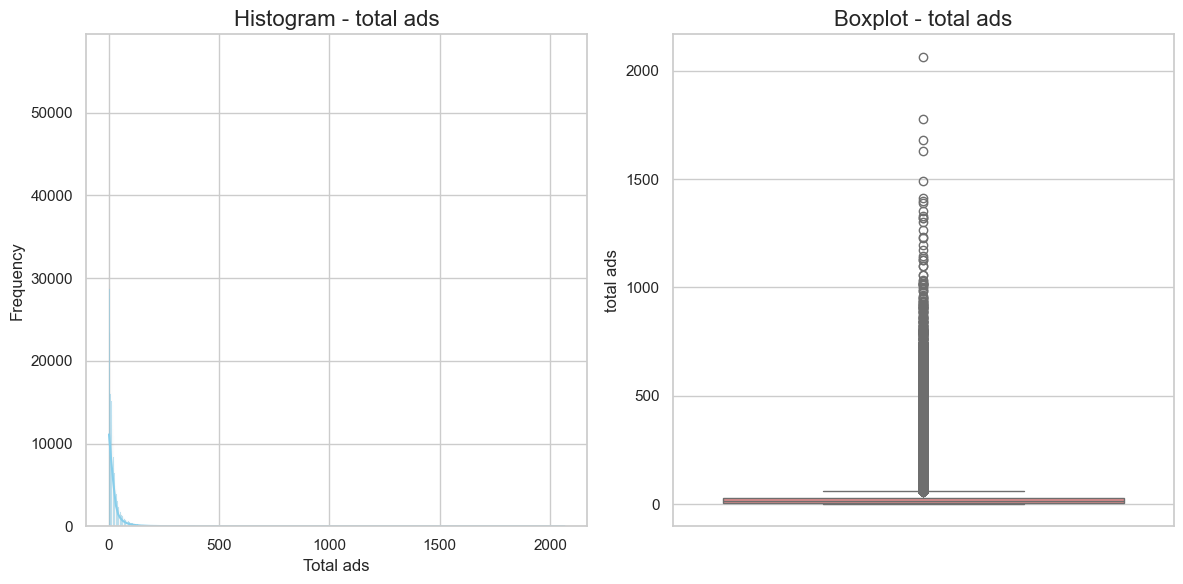

In [50]:
variable = 'total ads'

# Histogram
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df, kde=True, color="skyblue", edgecolor="black")
plt.title(f'Histogram - {variable}', fontsize=16)
plt.xlabel(variable.capitalize(), fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df, color="lightcoral")
plt.title(f'Boxplot - {variable}', fontsize=16)
plt.xlabel('')

plt.tight_layout()
plt.show()

In [23]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

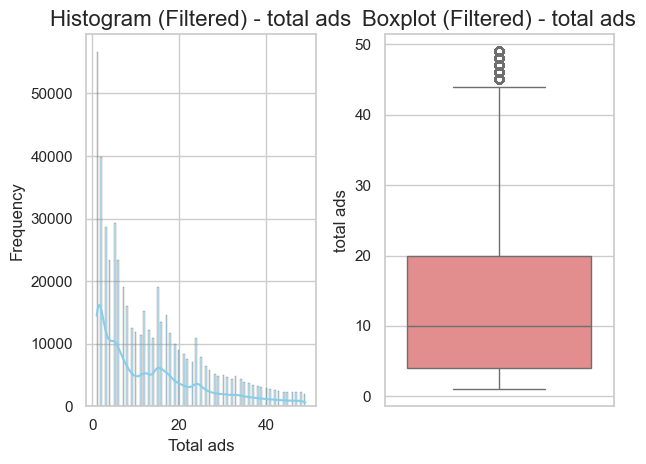

In [51]:
variable = 'total ads'

# Histogram with Filtered Data
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df[df['total ads'] < 50], kde=True, color="skyblue", edgecolor="black")
plt.title(f'Histogram (Filtered) - {variable}', fontsize=16)
plt.xlabel(variable.capitalize(), fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Boxplot with Filtered Data
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df[df['total ads'] < 50], color="lightcoral")
plt.title(f'Boxplot (Filtered) - {variable}', fontsize=16)
plt.xlabel('')

plt.tight_layout()
plt.show()

## Bivariate Analysis

To test whether there is a statistically significant relationship between the test group and conversion rate, as well as between other variables like `most ads day` and `most ads hour`, we employ the **Chi-Square Test**. 

To ensure proper statistical tests, we check for the assumptions of **normality** using the **Shapiro-Wilk Test** and **variance equality** using **Levene's Test**.

In [25]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [26]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


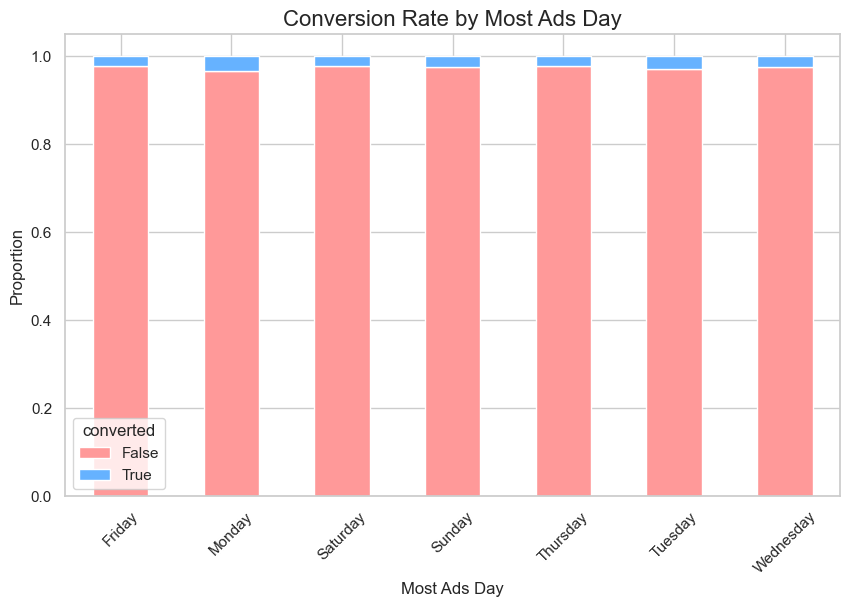

In [40]:
ct_conversion_day.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], figsize=(10, 6))
plt.title('Conversion Rate by Most Ads Day', fontsize=16)
plt.xlabel('Most Ads Day', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [28]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


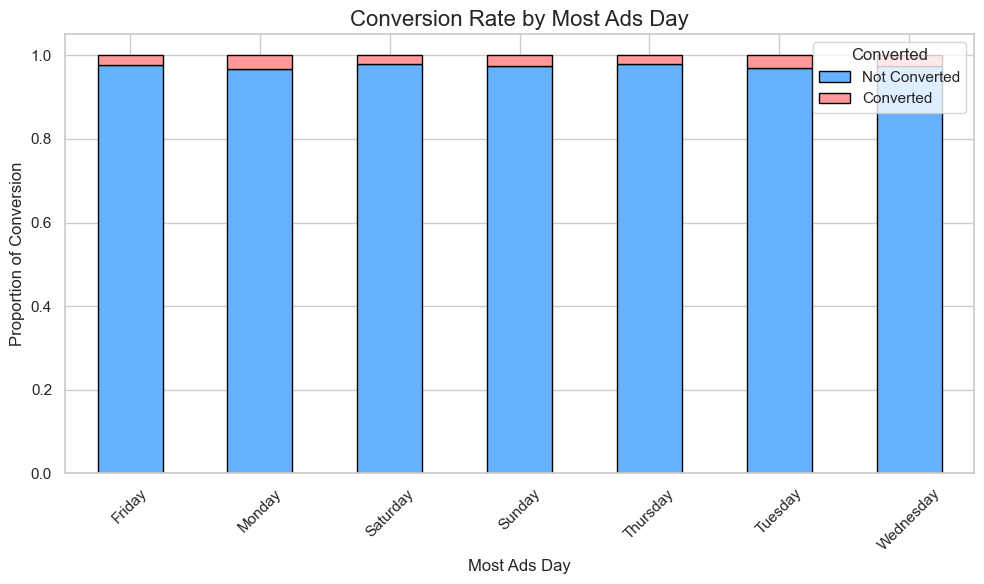

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
ct_conversion_day.plot(kind='bar', stacked=True, color=['#66B2FF', '#FF9999'], ax=ax, edgecolor="black")

# Add titles and labels
ax.set_title('Conversion Rate by Most Ads Day', fontsize=16)
ax.set_xlabel('Most Ads Day', fontsize=12)
ax.set_ylabel('Proportion of Conversion', fontsize=12)
ax.legend(title='Converted', loc='upper right', labels=['Not Converted', 'Converted'])

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Tight layout for clean spacing
plt.tight_layout()

plt.show()

In [30]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True, ascending=False))

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


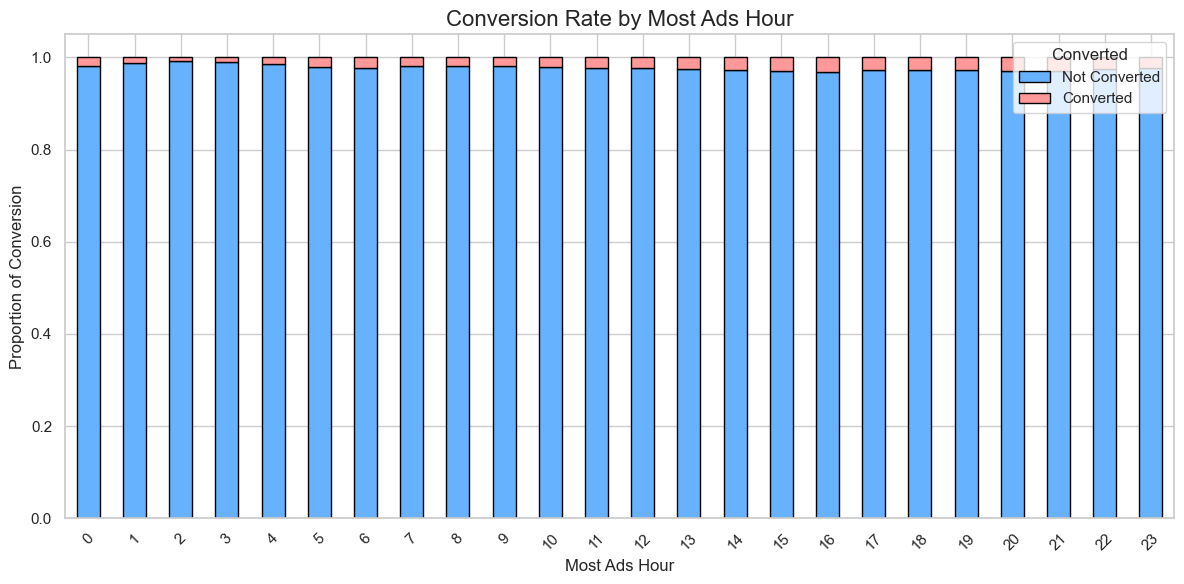

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
ct_conversion_hour.plot(kind='bar', stacked=True, color=['#66B2FF', '#FF9999'], ax=ax, edgecolor="black")

# Add titles and labels
ax.set_title('Conversion Rate by Most Ads Hour', fontsize=16)
ax.set_xlabel('Most Ads Hour', fontsize=12)
ax.set_ylabel('Proportion of Conversion', fontsize=12)
ax.legend(title='Converted', loc='upper right', labels=['Not Converted', 'Converted'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout for spacing adjustments
plt.tight_layout()

plt.show()

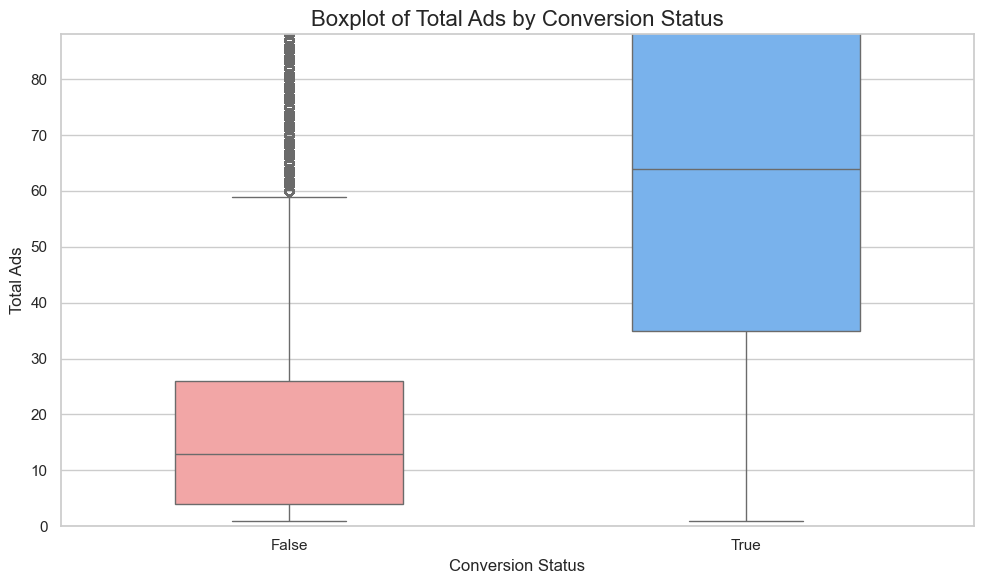

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='converted', y='total ads', data=df, palette=['#FF9999', '#66B2FF'], width=0.5)

# Title and labels
plt.title('Boxplot of Total Ads by Conversion Status', fontsize=16)
plt.xlabel('Conversion Status', fontsize=12)
plt.ylabel('Total Ads', fontsize=12)

# Set y-axis limit to focus on relevant range, if needed (e.g., plt.ylim(0, 200))
plt.ylim(0, df['total ads'].quantile(0.95))  # Adjust based on data if necessary

# Display the plot with tight layout
plt.tight_layout()
plt.show()

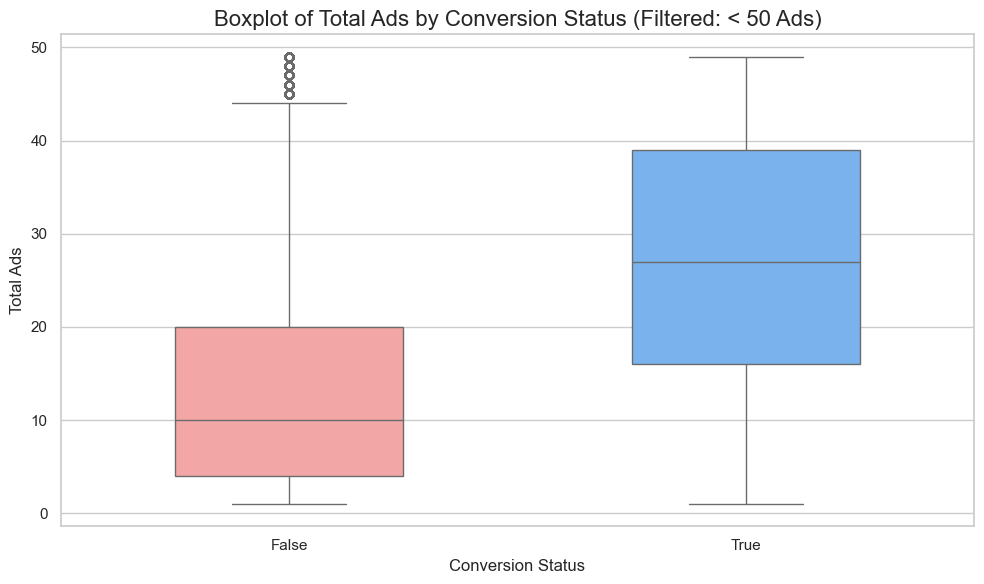

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='converted', y='total ads', data=df[df['total ads'] < 50], palette=['#FF9999', '#66B2FF'], width=0.5)

# Title and labels
plt.title('Boxplot of Total Ads by Conversion Status (Filtered: < 50 Ads)', fontsize=16)
plt.xlabel('Conversion Status', fontsize=12)
plt.ylabel('Total Ads', fontsize=12)

# Display the plot with tight layout
plt.tight_layout()
plt.show()

## Statistical tests

In [34]:
from scipy.stats import chi2_contingency

alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        # Create a contingency table (cross-tabulation)
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Display the results
        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        # Check for significance
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


The Chi-Square test comparing `test group` and `converted` showed a **statistically significant difference** (p < 0.05). This means that the conversion rate between the `ad` and `psa` campaigns is not due to chance. Therefore, we can conclude that one group performed better than the other in terms of conversion.

In [35]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Step 1: Check Assumptions
# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted'] == True]['total ads'], 
                                     df[df['converted'] == False]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


The Shapiro-Wilk test for normality returned **p-values = 0.0** for both the `True` and `False` groups, indicating that neither follows a normal distribution. Additionally, Levene's test for equality of variances returned **p = 0.0**, showing unequal variances between the two groups. Based on these results, we use the non-parametric **Mann-Whitney U Test**.

In [36]:
# Step 2: Perform a Suitable Test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions met - use t-test for means
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    # Assumptions not met - use Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


The Mann-Whitney U Test showed a **statistically significant difference** between the median `total ads` shown to converted and non-converted users, with a **p-value = 0.0**. This suggests that users who were converted saw a different number of ads compared to those who weren’t converted.

## A/B Testing on Continuous Variable: Total Ads

To further analyze the impact of ad frequency on conversion, we tested the relationship between the continuous variable `total ads` and the binary outcome `converted`. This analysis provides insight into whether a higher number of ads shown influences the likelihood of conversion.

We used **Point-Biserial Correlation** to quantify the linear association between `total ads` and `converted`, and we built a **linear regression model** to predict conversion probability based on ad frequency.

In [56]:
import statsmodels.api as sm
import scipy.stats as stats

# Correlation Analysis between total ads and converted status
correlation, p_value = stats.pointbiserialr(df['converted'].astype(int), df['total ads'])
print(f"Point-Biserial Correlation between Total Ads and Conversion: {correlation:.3f}")
print(f"p-value: {p_value:.3f}")

Point-Biserial Correlation between Total Ads and Conversion: 0.217
p-value: 0.000


- The Point-Biserial correlation coefficient between `total ads` and `converted` is **0.217**, indicating a positive, albeit moderate, linear relationship between ad frequency and conversion probability.

- The p-value is **0.000**, which is statistically significant (p < 0.05), suggesting that as ad frequency (`total ads`) increases, the likelihood of conversion also significantly increases.

In [57]:
# Linear Regression Model
X = sm.add_constant(df['total ads'])  # Adding constant for intercept
y = df['converted'].astype(int)       # Converting boolean to int for regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              converted   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                 2.918e+04
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:31:14   Log-Likelihood:             2.6920e+05
No. Observations:              588101   AIC:                        -5.384e+05
Df Residuals:                  588099   BIC:                        -5.384e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.000     25.596      0.0

- The linear regression analysis yields an estimated coefficient for `total ads` of **0.0008**, with a p-value of **0.000**. This indicates that each additional ad shown has a small but statistically significant positive impact on the probability of conversion.

- The model’s **R-squared value of 0.047** suggests that while the number of ads shown has a measurable impact on conversion, it accounts for a relatively small portion of the variance in conversion probability.

- These results imply that ad frequency positively correlates with conversion probability, albeit with a modest effect size. The statistical significance suggests that increasing the number of ads shown has a real impact on conversion rates, even though other factors may also influence conversion outcomes.

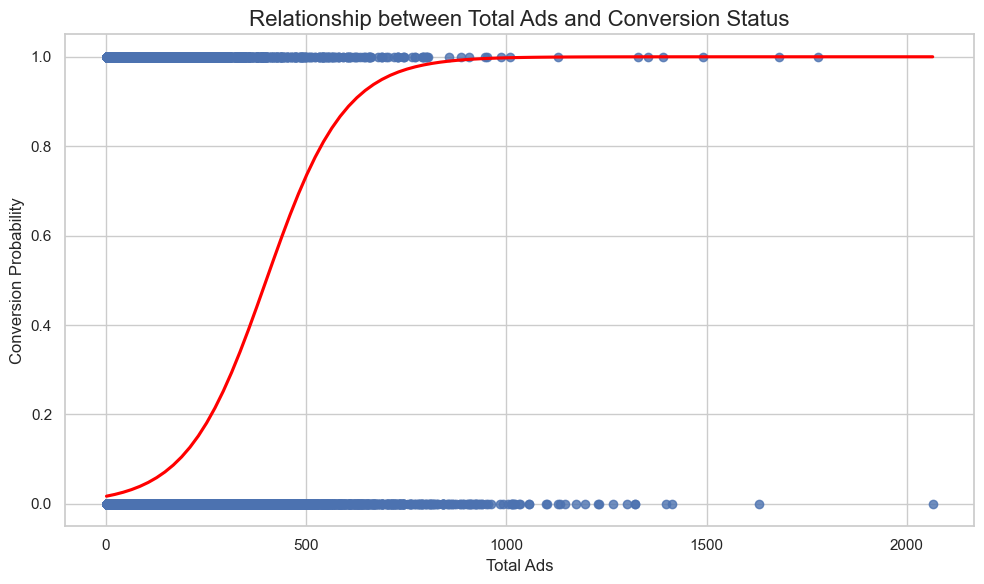

In [58]:
# Visualization of Relationship between Total Ads and Conversion
plt.figure(figsize=(10, 6))
sns.regplot(x='total ads', y='converted', data=df, logistic=True, ci=None, line_kws={'color': 'red'})
plt.title("Relationship between Total Ads and Conversion Status", fontsize=16)
plt.xlabel("Total Ads", fontsize=12)
plt.ylabel("Conversion Probability", fontsize=12)
plt.tight_layout()
plt.show()

## Effect Size Calculation: Cohen's d

To measure the impact of the marketing campaign (Ad vs. PSA) on the number of ads shown, we calculate the **effect size** using **Cohen's d**. Effect size helps us understand the magnitude of the difference between the two groups in terms of `total ads`, indicating whether the observed difference is practically significant, not just statistically significant.

**Cohen's d Interpretation**:
- **0.2** - Small effect
- **0.5** - Medium effect
- **0.8** - Large effect

In [59]:
# Calculate Effect Size (Cohen's d) between test groups on total ads
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = (((nx - 1) * x.std() ** 2 + (ny - 1) * y.std() ** 2) / dof) ** 0.5
    return (x.mean() - y.mean()) / pooled_std

# Separate the total ads values by test group
ad_group = df[df['test group'] == 'ad']['total ads']
psa_group = df[df['test group'] == 'psa']['total ads']

# Calculate Cohen's d
effect_size = cohen_d(ad_group, psa_group)
print(f"Cohen's d (Effect Size) between Ad and PSA groups for Total Ads: {effect_size:.3f}")

Cohen's d (Effect Size) between Ad and PSA groups for Total Ads: 0.001


- The Cohen’s d between the `ad` and `psa` groups for `total ads` was calculated to be **0.001**, indicating an extremely small effect size.

- With a Cohen's d of **0.001**, the effect size between the `ad` and `psa` groups on the number of ads shown is practically negligible. This result suggests that while there may be a statistically significant difference between the groups, the magnitude of this difference in practical terms is almost imperceptible. This reinforces the need to consider both statistical significance and effect size when assessing campaign impact.

## Statistical Testing Results

- **Chi-Square Test**: This test was used to compare the conversion rates between the `ad` and `psa` groups. The results indicated that the difference is statistically significant, with a p-value well below the 0.05 threshold.
  
- **Normality Tests (Shapiro-Wilk Test)**: Both groups (converted and non-converted) failed the normality test, indicating non-normal data distribution.

- **Variance Equality (Levene's Test)**: The test also showed unequal variances between the groups, suggesting the need for a non-parametric test like the **Mann-Whitney U Test** to compare the median `total ads` between the groups.

- **Linear Regression Analysis**: The coefficient for `total ads` was **0.0008** with a p-value of **0.000**, showing a statistically significant effect of ad frequency on conversion rates, though with a small practical impact as indicated by the low **R-squared value (0.047)**.

- **Cohen’s d Effect Size**:  Cohen’s d was calculated to be **0.001**, indicating an extremely small effect size. This suggests that while there is a statistically significant difference, its practical impact is minimal.

## Summary

This analysis of marketing campaign effectiveness involved multiple statistical tests to understand the relationship between ad exposure (`total ads`) and conversion across two groups (`ad` and `psa`). Key findings include:

- **Significant differences in conversion rates** between the `ad` and `psa` groups, as shown by the **Chi-Square Test**.
- **Ad frequency (`total ads`) has a moderate positive association with conversion probability**, as indicated by the **Point-Biserial Correlation** and **Linear Regression** results.
- **Effect size** calculations (Cohen’s d) reveal an extremely small practical difference in ad frequency between `ad` and `psa` groups.

In summary, while both ad type and ad frequency impact conversions, the effect of ad frequency on conversion rates is statistically significant but practically modest. These insights suggest that campaign adjustments involving ad type and frequency could enhance conversion rates, though other influencing factors may also warrant consideration.